In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os.path
from os import path
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [2]:
df = pd.read_csv('Data/FPT.csv',index_col='Date/Time')

In [3]:
df.head(10)

,Ticker,Open,High,Low,Close,Volume,Open Interest
Date/Time,,,,,,,
12/25/2018 9:15,FPT,30.89,30.89,30.89,30.89,35410,0
12/25/2018 9:16,FPT,30.81,30.81,30.81,30.81,190,0
12/25/2018 9:17,FPT,30.74,30.81,30.74,30.74,1120,0
12/25/2018 9:18,FPT,30.74,30.74,30.74,30.74,2120,0
12/25/2018 9:19,FPT,30.74,30.74,30.74,30.74,22500,0
12/25/2018 9:20,FPT,30.74,30.74,30.70,30.74,7140,0
12/25/2018 9:21,FPT,30.66,30.74,30.59,30.66,16480,0
12/26/2018 9:15,FPT,31.04,31.11,31.04,31.11,2650,0
12/26/2018 9:16,FPT,31.19,31.19,31.19,31.19,500,0


In [4]:
df.describe()

,Open,High,Low,Close,Volume,Open Interest
count,97406.000000,97406.000000,97406.000000,97406.000000,9.740600e+04,97406.0
mean,45.071630,45.090138,45.051430,45.071631,8.044173e+03,0.0
std,6.359803,6.364950,6.354245,6.359799,1.753203e+04,0.0
min,30.250000,30.250000,30.220000,30.250000,1.000000e+01,0.0
25%,39.740000,39.740000,39.700000,39.740000,7.500000e+02,0.0
50%,46.950000,46.950000,46.950000,46.950000,2.960000e+03,0.0
75%,49.200000,49.250000,49.170000,49.200000,8.960000e+03,0.0
max,58.400000,58.500000,58.400000,58.400000,1.255930e+06,0.0


In [5]:
df.info

<bound method DataFrame.info of                  Ticker   Open   High    Low  Close  Volume  Open Interest
Date/Time                                                                 
12/25/2018 9:15     FPT  30.89  30.89  30.89  30.89   35410              0
12/25/2018 9:16     FPT  30.81  30.81  30.81  30.81     190              0
12/25/2018 9:17     FPT  30.74  30.81  30.74  30.74    1120              0
12/25/2018 9:18     FPT  30.74  30.74  30.74  30.74    2120              0
12/25/2018 9:19     FPT  30.74  30.74  30.74  30.74   22500              0
...                 ...    ...    ...    ...    ...     ...            ...
12/22/2020 14:24    FPT  58.20  58.20  58.20  58.20   27470              0
12/22/2020 14:25    FPT  58.20  58.20  58.20  58.20   14820              0
12/22/2020 14:26    FPT  58.20  58.20  58.20  58.20     500              0
12/22/2020 14:29    FPT  58.10  58.10  58.10  58.10    2500              0
12/22/2020 14:46    FPT  58.10  58.10  58.10  58.10   11170         

In [7]:
df

,Open,High,Low,Close,Volume
Date/Time,,,,,
12/25/2018 9:15,30.89,30.89,30.89,30.89,35410
12/25/2018 9:16,30.81,30.81,30.81,30.81,190
12/25/2018 9:17,30.74,30.81,30.74,30.74,1120
12/25/2018 9:18,30.74,30.74,30.74,30.74,2120
12/25/2018 9:19,30.74,30.74,30.74,30.74,22500
...,...,...,...,...,...
12/22/2020 14:24,58.20,58.20,58.20,58.20,27470
12/22/2020 14:25,58.20,58.20,58.20,58.20,14820
12/22/2020 14:26,58.20,58.20,58.20,58.20,500


In [8]:
#kiểm tra độ mất mát dữ liệu 
df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

c:\Users\trana\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


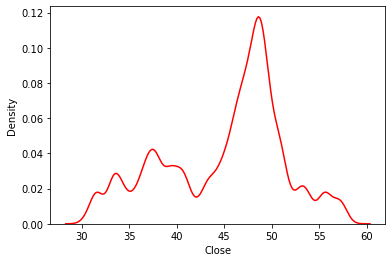

In [9]:
ax1 = sns.distplot(df['Close'], hist = False, color = "r", label = "Close")

In [5]:

train_size = int(len(df) * 0.7)
data_train = df[:train_size]
data_test = df[train_size:]


In [6]:
data_test

,Ticker,Open,High,Low,Close,Volume,Open Interest
Date/Time,,,,,,,
6/11/2020 9:27,FPT,48.60,48.60,48.55,48.55,18700,0
6/11/2020 9:28,FPT,48.55,48.60,48.50,48.50,6100,0
6/11/2020 9:29,FPT,48.50,48.55,48.50,48.55,2680,0
6/11/2020 9:30,FPT,48.55,48.55,48.50,48.50,8490,0
6/11/2020 9:31,FPT,48.55,48.55,48.50,48.55,1600,0
...,...,...,...,...,...,...,...
12/22/2020 14:24,FPT,58.20,58.20,58.20,58.20,27470,0
12/22/2020 14:25,FPT,58.20,58.20,58.20,58.20,14820,0
12/22/2020 14:26,FPT,58.20,58.20,58.20,58.20,500,0


In [7]:
data_train

,Ticker,Open,High,Low,Close,Volume,Open Interest
Date/Time,,,,,,,
12/25/2018 9:15,FPT,30.89,30.89,30.89,30.89,35410,0
12/25/2018 9:16,FPT,30.81,30.81,30.81,30.81,190,0
12/25/2018 9:17,FPT,30.74,30.81,30.74,30.74,1120,0
12/25/2018 9:18,FPT,30.74,30.74,30.74,30.74,2120,0
12/25/2018 9:19,FPT,30.74,30.74,30.74,30.74,22500,0
...,...,...,...,...,...,...,...
6/11/2020 9:22,FPT,48.60,48.65,48.60,48.65,2680,0
6/11/2020 9:23,FPT,48.60,48.65,48.60,48.60,4810,0
6/11/2020 9:24,FPT,48.60,48.60,48.55,48.55,4020,0


In [8]:
training_set = data_train.iloc[:,3:4].values

In [9]:
training_set

array([[30.89],
       [30.81],
       [30.74],
       ...,
       [48.55],
       [48.55],
       [48.55]])

In [10]:
# Thuc hien scale du lieu gia ve khoang 0,1
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [35]:
# Tao du lieu train, X = 30 time steps, Y =  1 time step
X_train = []
y_train = []
no_of_sample = len(training_set)

for i in range(30, no_of_sample):
    X_train.append(training_set_scaled[i-30:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [36]:
no_of_sample

68184

In [38]:
# Xay dung model LSTM
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [40]:
# Neu ton tai file model thi load
if path.exists("mymodel.h5"):
    regressor.load_weights("mymodel.h5")
else:
    # Con khong thi train
    regressor.fit(X_train, y_train, epochs = 4, batch_size = 64)
    regressor.save("mymodel.h5")

Epoch 1/4
1065/1065 [==============================] - 118s 111ms/step - loss: 0.0024
Epoch 2/4
1065/1065 [==============================] - 116s 109ms/step - loss: 0.0016
Epoch 3/4
1065/1065 [==============================] - 110s 104ms/step - loss: 0.0011
Epoch 4/4
1065/1065 [==============================] - 99s 93ms/step - loss: 8.1454e-04


In [41]:
# data test
real_stock_price = data_test.iloc[:,3:4].values

In [42]:
real_stock_price

array([[48.55],
       [48.5 ],
       [48.5 ],
       ...,
       [58.2 ],
       [58.1 ],
       [58.1 ]])

In [44]:
# Tien hanh du doan
dataset_total = pd.concat((data_train['Close'], data_test['Close']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(data_test) - 30:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
no_of_sample = len(inputs)

for i in range(30, no_of_sample):
    X_test.append(inputs[i-30:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

914/914 [==============================] - 16s 16ms/step


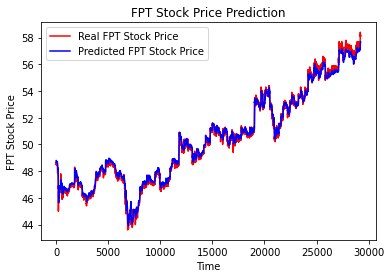

In [45]:
# Ve bieu do gia that va gia du doan
plt.plot(real_stock_price, color = 'red', label = 'Real FPT Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted FPT Stock Price')
plt.title('FPT Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('FPT Stock Price')
plt.legend()
plt.show()